In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import collections

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
unnormalised_dataset  = input('''''')
unnormalised_dataset

sun sets at west sun sets at east sun sets at east sun sets at east sun sets at north


'sun sets at west sun sets at east sun sets at east sun sets at east sun sets at north'

In [ ]:
import re
def normalize_text(text):
    text=text.lower()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(pic\.twitter\.com/[^\s]+))','', text)
    text = re.sub('@[^\s]+','', text)
    text = re.sub('#([^\s]+)', '', text)
    text = re.sub('[:;>?<=*+()&,\-#!$%\{˜|\}\[^_\\@\]1234567890’‘]',' ', text)
    text = re.sub('[\d]','', text)
    text = text.replace(".", '')
    text = text.replace("'", '')
    text = text.replace("`", '')
    text = text.replace("'s", '')
    text = text.replace("/", ' ')
    text = text.replace("\"", ' ')
    text = text.replace("\\", '')
    #text =  re.sub(r"\b[a-z]\b", "", text)
    text=re.sub( '\s+', ' ', text).strip()
    
    return text

In [ ]:
dataset = normalize_text(unnormalised_dataset)
dataset

'sun sets at west sun sets at east sun sets at east sun sets at east sun sets at north'

In [ ]:
def create_cloud(data):
  cloud  = WordCloud(background_color ='white',max_words= 100,stopwords=set(STOPWORDS))
  cloud.generate(data)
  plt.imshow(cloud)
  plt.show()

In [ ]:
dataset = dataset.lower()

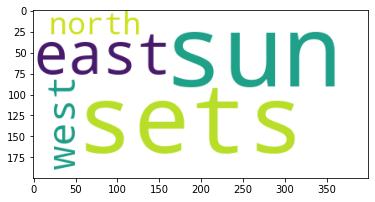

In [ ]:
create_cloud(dataset)

In [ ]:
def Lemmatizer(text):
  lemmatizer = WordNetLemmatizer()
  tokens=[lemmatizer.lemmatize(word) for word in text]
  return tokens


In [ ]:
def Stemming(text):
  ps = PorterStemmer()
  tokens=[ps.stem(word) for word in text]
  print(tokens)

In [ ]:
stopwords = set(STOPWORDS)
text_tokens = word_tokenize(dataset)
text_without_stopwords = [x for x in text_tokens if x not in stopwords]


In [ ]:
Stemming(text_without_stopwords)

['sun', 'set', 'west', 'sun', 'set', 'east', 'sun', 'set', 'east', 'sun', 'set', 'east', 'sun', 'set', 'north']


In [ ]:
text_without_stopwords=Lemmatizer(text_without_stopwords)

In [ ]:
word_count = collections.Counter(text_without_stopwords).most_common()
word_count

[('sun', 5), ('set', 5), ('east', 3), ('west', 1), ('north', 1)]

In [ ]:
feature = [word_count[i][0] for i in range(len(word_count))]
feature

['sun', 'set', 'east', 'west', 'north']

In [ ]:
#training_examples
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(text_without_stopwords)

In [ ]:
#bow.todense()

In [ ]:
import pandas as pd
feature_names = vectorizer.get_feature_names()
corpus_index = [n for n in text_without_stopwords]
data = pd.DataFrame(bow.todense(), index=corpus_index, columns=feature_names)
data.head(6)

,east,north,set,sun,west
sun,0,0,0,1,0
set,0,0,1,0,0
west,0,0,0,0,1
sun,0,0,0,1,0
set,0,0,1,0,0
east,1,0,0,0,0


In [ ]:
text =input("""Enter the answer = """)
text


1)Normalize
2)tokenize and Remove  Stopwords
3) Stemming alg / Lemmatize
4)Vectorize(bow)
5)Feature_frequency 
6)DataFrame

In [ ]:
test = normalize_text(text)
test

In [ ]:
create_cloud(test)

In [ ]:
test = word_tokenize(test)
test

In [ ]:
test = [x for x in test if x not in stopwords]
test

In [ ]:
test = Lemmatizer(test)
test

In [ ]:
def counter(list):
  list1=[]
  list3=[]
  for i in list:
    list2=[]
    if i not in list3:
      list3.append(i)
      list2.append(i)
      list2.append(list.count(i))
      list1.append(tuple(list2))

  return list1


In [ ]:
test_sample =counter(test)
test_sample

In [ ]:
vc_test=vectorizer.fit_transform(test)
print(vc_test.todense())

In [ ]:
feature_test = vectorizer.get_feature_names()
test_index = [n for n in test]
df = pd.DataFrame(vc_test.todense(), index=test_index, columns=feature_test)
df

In [ ]:
from sklearn.naive_bayes import GaussianNB
Bnb = GaussianNB()

In [ ]:
list=data.columns.to_list()
list.remove(input('Enter correct answer = ').lower())
x= data[list]
y = data[[c for c in feature if c not in list]]

In [ ]:
Bnb.fit(x,y)

In [ ]:
testx = df[list]


In [ ]:
Bnb.predict(testx)

In [ ]:
df